# Sopio Bregadze 616049
# Benutzte Formeln:
# $ma = F = 4 (\frac{12 \cdot \sigma^{12}}{r^{12}} - \frac{6 \cdot \sigma^{6}}{r^6}) \frac{\epsilon}{r}$
# $V = 4 \epsilon (\frac{ \sigma^{12}}{r^{12}} - \frac{ \sigma^{6}}{r^6}) $
# $T= \frac{1}{f \cdot N} \cdot \sum_{i=0}^{N} m_i \cdot v_i^2$
# $v_{rms}=\sqrt{\frac{T}{2 \cdot m}}$
# Der Leapfrog Algorithmus:
# $v_j(-\frac{\tau}{2})=v_j(0) - a_j(0)\frac{\tau}{2}$
# $v_j(t+\frac{\tau}{2})=v_j(t-\frac{\tau}{2}) + a_j(t)\tau$
# $r_j(t+\tau)=r_j(t) + v_j(t+\frac{\tau}{2}) \tau$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sciopt

In [2]:
def Force (r, epsilon=140.0, sigma=3.36): # epsilon in K und sigma in Angstrom
    return 4*epsilon*(12*((sigma/r)**12)-6*((sigma/r)**6))/r;

In [3]:
def solveDGL (T, r, t_tot=10, tau=0.001): # in K, Angström, ps, ps
    t=np.arange(0, t_tot, tau)
    r1=np.zeros((len(t)))
    r2=np.zeros((len(t)))
    v0_1=np.sqrt(T/(2*m))
    v0_2=-v0_1
    r1[0]=0
    r2[0]=r
    v_minus_half_tau_1=v0_1 - Force(-r)*tau/(2*m)
    v_minus_half_tau_2=v0_2 - Force(r)*tau/(2*m)
    for i in range(0, len(t)-1):
        #Atom 1:
        v_plus_half_tau_1=v_minus_half_tau_1 + Force(r1[i]-r2[i])*tau/m
        r1[i+1]=r1[i] + v_plus_half_tau_1*tau
        v_minus_half_tau_1=v_plus_half_tau_1
        #Atom 2:
        v_plus_half_tau_2=v_minus_half_tau_2 + Force(r2[i]-r1[i])*tau/m
        r2[i+1]=r2[i] + v_plus_half_tau_2*tau
        v_minus_half_tau_2=v_plus_half_tau_2
        
        #print(i, r1[i+1], r2[i+1])
        
    return(t, r1, r2)

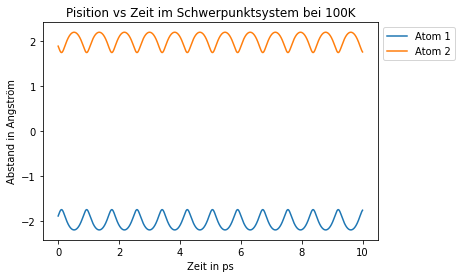

Text(0.5, 1.0, 'Abstände vs Zeit im Schwerpunktsystem bei 100K')

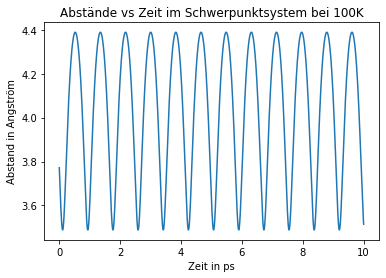

In [4]:
m=14
zero=sciopt.fsolve(Force, 0.5, full_output="true")
r=zero[0]

#r1=np.linspace(3.5,5,20)
#f=[]
#for i in r1:
#    f.append(Force(i)/m)
#print(Force(3.5)/m)
#plt.plot(r1, f)
#plt.show()

ans=solveDGL(100, r)
plt.plot(ans[0],ans[1]-r/2, label="Atom 1")
plt.plot(ans[0],ans[2]-r/2, label="Atom 2")
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Pisition vs Zeit im Schwerpunktsystem bei 100K')
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

plt.plot(ans[0],ans[2]-ans[1])
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Abstände vs Zeit im Schwerpunktsystem bei 100K')
#plt.legend(bbox_to_anchor = [1, 1])

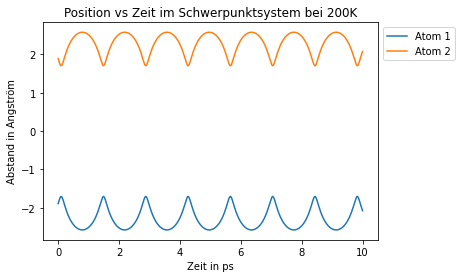

Text(0.5, 1.0, 'Abstände vs Zeit im Schwerpunktsystem bei 200K')

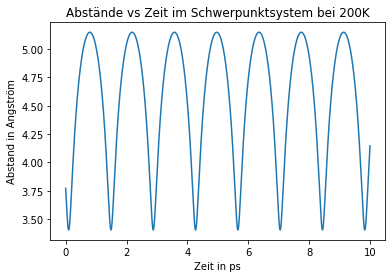

In [5]:
ans=solveDGL(200, r)
plt.plot(ans[0],ans[1]-r/2, label="Atom 1")
plt.plot(ans[0],ans[2]-r/2, label="Atom 2")
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Position vs Zeit im Schwerpunktsystem bei 200K')
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

plt.plot(ans[0],ans[2]-ans[1])
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Abstände vs Zeit im Schwerpunktsystem bei 200K')
#plt.legend(bbox_to_anchor = [1, 1])

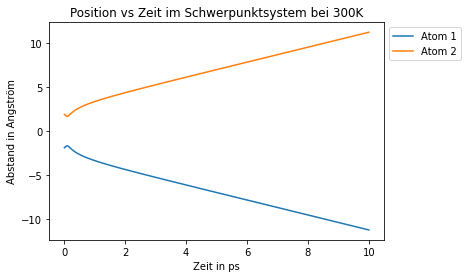

Text(0.5, 1.0, 'Abstände vs Zeit im Schwerpunktsystem bei 300K')

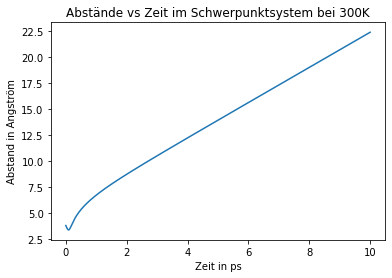

In [6]:
ans=solveDGL(300, r)
plt.plot(ans[0],ans[1]-r/2, label="Atom 1")
plt.plot(ans[0],ans[2]-r/2, label="Atom 2")
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Position vs Zeit im Schwerpunktsystem bei 300K')
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

plt.plot(ans[0],ans[2]-ans[1])
plt.xlabel('Zeit in ps')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Abstände vs Zeit im Schwerpunktsystem bei 300K')
#plt.legend(bbox_to_anchor = [1, 1])

Text(0.5, 1.0, 'Abstände vs Temperatur')

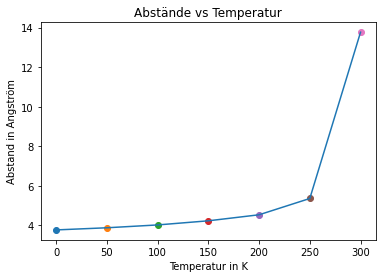

In [7]:
T=np.arange(0, 350, 50)
d=[]
for i in range(7):
    ans=solveDGL(T[i], r)
    d.append(0)
    for j in range(np.size(ans[0])):
        d[i]+=np.abs(ans[2][j]-ans[1][j]);
    d[i]/=np.size(ans[0]);
    plt.scatter(T[i],d[i])

plt.plot(T, d)
plt.xlabel('Temperatur in K')
plt.ylabel('Abstand in Angström')
#plt.axis("equal")
plt.title('Abstände vs Temperatur')

Man kann die folgenden Zussamenhänge beobachten:

Für kleine Temperaturen ändert sich der Abstand zwischen den Atomen  periodisch (je kleiner die Temperatur, desto kleiner die Periode), aber wenn die Temperatur größer als eine bestimmte kritische Temperatur ist, nimmt der Abstand immer zu.

Für kleine Abstände wirkt die Abstoßungskraft und für größere die Anziehungskraft. Das verursacht die periodische Oszillation des Abstands. Wenn die Temperatur klein ist, ist auch die Anfangsgeschwindigkeit klein, und es gibt am Anfang keine starke Abstangsänderung, deswegen ist die Periode auch klein. Für größere Temperaturen dauert es länger die Atome in die Anfangsposition zurück zu bringen.

Wenn die Temperature sehr groß wird, gibt es 2 Fälle (es hängt von den Richtungen der Anfangsgeschwindigkeiten ab): Die Atome fliegen sehr schnell auseinander; oder sie fliegen am Anfang sehr nah aneinander, die Abstoßungskraft ist stark und lässt sie sehr schnell auseinander fliegen. Danach ist (in beide Fälle) die Anziehungskraft zu schwach um die Richtung von der Geschwindigkeit zu ändern.